In [172]:
import pandas as pd
import matplotlib
# from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
print matplotlib.__version__

1.5.1


In [174]:
test = [[u'Aug', u'04', u'02:46:15', u'The Lower Spokane St Bridge has closed to   traffic - 7:46:11 PM'], [u'Aug', u'04', u'01:54:48', u'The Lower Spokane St Bridge has closed to   traffic - 6:54:45 PM'], [u'Aug', u'04', u'00:49:28', u'The Lower Spokane St Bridge has closed to   traffic - 5:49:24 PM']]

In [175]:
test[1]

[u'Aug',
 u'04',
 u'01:54:48',
 u'The Lower Spokane St Bridge has closed to   traffic - 6:54:45 PM']

In [176]:
test[2]

[u'Aug',
 u'04',
 u'00:49:28',
 u'The Lower Spokane St Bridge has closed to   traffic - 5:49:24 PM']

In [177]:
test[2][1]

u'04'

In [178]:
from datetime import datetime

In [179]:
timestring = "Fri Aug 08 10:15:11 +0000 2015"

In [180]:
date_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

In [181]:
date_object

datetime.datetime(2005, 6, 1, 13, 33)

In [182]:
newtimestring = timestring.split(" ")

In [183]:
' '.join(newtimestring[-2:-1])

'+0000'

In [184]:
newtimestring = ' '.join(timestring.split(" ")[:-2])

In [185]:
newtimestring = newtimestring + " " + timestring.split(" ")[-1]

In [186]:
my_object = datetime.strptime(newtimestring, '%a %b %d %H:%M:%S %Y')

In [187]:
my_object

datetime.datetime(2015, 8, 8, 10, 15, 11)

In [188]:
present = datetime.now()

In [189]:
diff = present - my_object

In [190]:
diff.seconds/3600

5

In [191]:
def days_hours_minutes(td):
    mydict = {}
    mydict['days'] = td.days
    mydict['hours'] = td.seconds//3600
    mydict['minutes'] = (td.seconds//60)%60
    return mydict

In [192]:
newdiff = days_hours_minutes(diff)

In [193]:
newdiff['days']

175

In [194]:
# only report if difference is in past 30 minutes
if newdiff['days'] == 0 and newdiff['hours'] == 0 and newdiff['minutes'] < 30:
    print 'yes'

In [195]:
minutes = diff.seconds // 60 % 60

In [196]:
diff.days

175

In [197]:
present

datetime.datetime(2016, 1, 30, 15, 22, 18, 114997)

In [198]:
my_object

datetime.datetime(2015, 8, 8, 10, 15, 11)

In [199]:
diff.seconds/3600

5

In [200]:
type({"timestamp_ms":"1439066732117"})

dict

In [201]:
present = datetime.now()

In [202]:
present

datetime.datetime(2016, 1, 30, 15, 22, 18, 254085)

In [203]:
startTime = "4:25PM"
endTime = "7:30PM"

In [204]:
startTimeObj = datetime.strptime(startTime, '%I:%M%p')
endTimeObj = datetime.strptime(endTime, '%I:%M%p')

In [205]:
startTime

'4:25PM'

In [206]:
# join the start time string with fields to match a datetime.now() object
present.hour

15

In [207]:
startTimeObj.hour
endTimeObj.hour

19

In [208]:
startTimeObj.minute
endTimeObj.hour

19

In [209]:
if startTimeObj.hour <= present.hour <= endTimeObj.hour and \
   startTimeObj.minute <= present.minute <= endTimeObj.minute:
    print "yes"

In [210]:
import pandas as pd 

df = pd.read_csv('SDOTBridges_tweets.csv')

In [211]:
len(df)

3246

In [212]:
df['bridge'] = df['text'].map(lambda x: x.split('The ')[-1].split(' Bridge')[0])
df['date'] = df['text'].map(lambda x: x.split('- ')[-1])
df['event'] = df['text'].apply(lambda x: 'closed' if ('closed' in x) else 'open')
df_clean = df[['bridge','date', 'event', 'text']]

In [213]:
# Now we have all the relevant open and closing information
# we need to reorganize  to turn open and close events into periods of closure
# df_clean

In [214]:
# Make sure all date columns have valid dates

# Convert to datetime object

# remove leading spaces


# Filter out rows that don't have a date in them


In [215]:
df_clean.groupby('bridge').count()

,date,event,text
bridge,,,
1st Ave S,215,215,215
@seattledot Its cleared.,1,1,1
"@zachstednick It opens when there is a boat waiting, so not everyday. Plus this only posts boat openings btwn hours of 6am-10pm.",1,1,1
Ballard,723,723,723
Fremont,1071,1071,1071
Hearing of some sort of issue with the Montlake,1,1,1
Lower Spokane St,297,297,297
Montlake,290,290,290
South Park,162,162,162


In [216]:
bridge_list = ['Ballard', 'Fremont', '1st Ave S', 'Montlake', 'Lower Spokane St', 'South Park', 'University']

In [217]:
# Select only lines with a bridge name in the bridge list
newdf = df_clean[df_clean['bridge'].isin(bridge_list)]

In [218]:
newdf.groupby('bridge').count().index

Index([u'1st Ave S', u'Ballard', u'Fremont', u'Lower Spokane St', u'Montlake',
       u'South Park', u'University'],
      dtype='object', name=u'bridge')

In [219]:
# There are still some records with weird data
# Get rid of date rows without dates

# first get rid of the extra space in the date string
newdf['newdate'] = newdf['date'].str.lstrip()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [220]:
len(newdf)

3241

In [221]:
# Only include date rows with PM or AM
newdf = newdf[newdf['newdate'].str.contains('PM|AM')]
len(newdf)

3240

In [222]:
newdf['dateobj'] = pd.to_datetime(newdf['newdate'], format="%H:%M:%S %p", errors='coerce')

In [223]:
newdf.iloc[0].dateobj.hour

7

In [224]:
# newdf[newdf['bridge'] == 'Fremont']

In [225]:
##############################################

In [226]:
# NOTE: data is presented with most recent events at top, makes more sense chronologically to put oldest at top row
# REVERSE the DF
newdf = newdf.reindex(index=newdf.index[::-1])

In [231]:
# one dumb way to do this is to loop through each trip, comparing it to the next 
# and creating a resulting new dataframe from that
# perhaps there's a more efficient way?

# we need to loop through each bridge's trips to make this happen
# start with just a single bridge
ballard = newdf.query('bridge == "Ballard"')

# store results in a new dataframe
results = []

for i in range(len(ballard)):
    firstrow = ballard.iloc[i]
    # get the next row, except on the last row in dataframe
    if i == len(ballard)-1:
        break
    else:
        nextrow = ballard.iloc[i+1]
    
    # make sure the first 
    
    # return total time difference as a 'timedelta' object
    results.append(nextrow.dateobj - firstrow.dateobj)
    
    
    

In [232]:
# newdf[newdf['bridge'] == 'Ballard']

In [233]:
# Alternatively, we need to know each closure event (bridge opening for a ship to cross)
# and calculate the subsequent re-opening time, usually from the following row

# do that by getting the index of each bridge closure and taking index+1 for the re-opening
# for the ballard bridges
bridgelist = newdf.groupby('bridge').count().index
duration = []
closehr = []
closemin = []
closesec = []
bridgename = []

for bridge in bridgelist:
    bridgedf = newdf[newdf['bridge'] == bridge]

    # reindex this slice because we need to consider each row i and i+1 for these bridges only
    bridgedf.reset_index(inplace=True)

    closure_event_index = bridgedf[bridgedf['event'] == 'closed'].index

    # These index values should be offset by 2 (one closure row followed by one reopening row)
    # Flag unspaced index occurences
    

    for i in closure_event_index[:-2]:
        # if the next entry is a reopening, compute the closure time
    #     print i
        if bridgedf.iloc[i+1]['event'] == 'open':
            # compute the close time between i and i+1
    #         print ballard.iloc[i]['event']
    #         print ballard.iloc[i+1]['event']
            duration.append((bridgedf.iloc[i+1]['dateobj'] - bridgedf.iloc[i]['dateobj']).seconds)
            closetime = bridgedf.iloc[i]['dateobj']
            closehr.append(closetime.hour)
            closemin.append(closetime.minute)
            closesec.append(closetime.second)
            bridgename.append(bridge)
        else:
            continue
    
# Convert to dataFrame
df = pd.DataFrame(data=[duration, closehr,closemin,closesec,bridgename]).T
df.columns=['Duration','Closure Hour','Closure Minute','Closure Second','Bridge']

In [235]:
df['Duration']

0        426
1        230
2        400
3        546
4        629
5        344
6        493
7        716
8        440
9        391
10       559
11       571
12       507
13       491
14       640
15       541
16       407
17      1063
18      1077
19       233
20       604
21       716
22       352
23       375
24       684
25       572
26       301
27       503
28       386
29       392
        ... 
1564     151
1565     240
1566     339
1567     392
1568     244
1569     231
1570     468
1571     403
1572     155
1573     204
1574     337
1575     232
1576     336
1577     288
1578      70
1579     246
1580     271
1581     199
1582      99
1583     487
1584     353
1585     297
1586     469
1587     154
1588     445
1589     287
1590     237
1591     172
1592     534
1593     484
Name: Duration, dtype: object

In [236]:
# Looks there are some records with very long opening, perhaps errors?
# We can dig into that later, or just drop the really long records
df['Duration'].max()/3600

12

In [237]:
# Select closings less than 2 hours
df = df[df['Duration'] < 3600*2]

In [248]:
import numpy as np

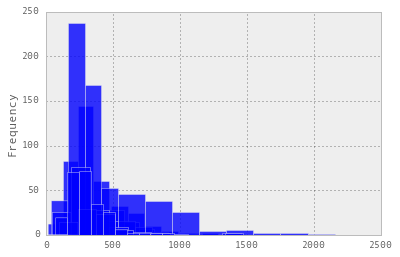

In [260]:
# Distribution by bridge
for bridge in df.groupby('Bridge').count().index:
    newdf = df[df['Bridge'] == bridge]
    newdf['Duration'].plot(kind='hist',subplots=True, alpha=0.8)
#     newdf['Duration'].hist(by=newdf.index,subplots=True, alpha=0.8)